# Data exploration and analysis

## Imports

In [1]:
import pandas as pd
import json
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.ensemble import RandomForestRegressor

## Open file and read it into dataframe

In [2]:
file_name = 'D:\Programming\Repositories\mini-cv\dataset\\2021-10\\2021-10-23.json'
with open(file_name, "r", encoding="utf-8") as file:
    data = json.load(file) 

# Convert to DataFrame
df = pd.DataFrame(data)
df

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,experience_level,latitude,longitude,published_at,remote_interview,id,employment_types,company_logo_url,skills,remote
0,Junior Front-end Developer (Angular),Dąbrowskiego,Białystok,PL,"Dąbrowskiego, Białystok",javascript,partly_remote,Symmetra sp. z o.o.,https://www.symmetra.pl/,200+,junior,53.1359902,23.1427479,2021-10-23T08:00:23.064Z,True,symmetra-sp-z-o-o-junior-front-end-developer-a...,"[{'type': 'b2b', 'salary': {'from': 4500, 'to'...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Java', 'level': 1}, {'name': 'TypeS...",False
1,Senior Ruby on Rails Developer,Aleja Niepodległości 124,Warszawa,PL,"Aleja Niepodległości 124, Warszawa",ruby,remote,Startup House,https://start-up.house/,90+,senior,52.2031098,21.0105616,2021-10-23T08:00:23.064Z,True,startup-house-senior-ruby-on-rails-developer-r...,"[{'type': 'b2b', 'salary': {'from': 16000, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Ruby on Rails', 'level': 4}, {'name...",True
2,Senior Java Software Engineer,Al. Grunwaldzka 472 C,Gdańsk,PL,"Al. Grunwaldzka 472 C, Gdańsk",java,remote,Aspire Systems Poland,https://www.aspiresys.com/pl,120+,senior,54.4035824,18.5709355,2021-10-23T08:00:23.064Z,True,aspire-systems-poland-senior-java-software-eng...,"[{'type': 'b2b', 'salary': {'from': 13500, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Spring Boot', 'level': 3}, {'name':...",True
3,Python Developer with Django,Centrum,Warszawa,PL,"Centrum, Warszawa",python,remote,Codahead,http://codahead.com,50,mid,52.2293895,21.0131979,2021-10-23T08:00:23.064Z,True,codahead-python-developer-with-django-warszawa,"[{'type': 'b2b', 'salary': {'from': 10000, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Django', 'level': 3}, {'name': 'Pyt...",True
4,Android Developer,Taśmowa 7,Warszawa,PL,"Taśmowa 7, Warszawa",mobile,remote,ITLT,http://www.itlt.pl,100,mid,52.1798825,20.9896461,2021-10-23T08:00:23.064Z,True,itlt-android-developer-6198517a-92c4-4e41-95f6...,"[{'type': 'b2b', 'salary': {'from': 21000, 'to...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Android Studio', 'level': 4}, {'nam...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6643,Senior Backend PHP Developer (m/f/d),Domstraße 10,Hamburg,DE,"Domstraße 10, Hamburg",php,remote,ABOUT YOU AG & Co. KG,https://corporate.aboutyou.de/en/,15000,senior,53.5492995,9.9956507,2021-09-24T12:50:00.000Z,True,about-you-ag-co-kg-senior-backend-php-develope...,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'PHP 7', 'level': 4}]",True
6644,PHP Senior Software Engineer,Anson Road,Singapore,SG,"Anson Road, Singapore",php,remote,Triber,https://triber.com.ph/,40+,senior,1.2736152,103.8447006,2021-09-23T13:48:00.000Z,True,triber-software-engineer,"[{'type': 'permanent', 'salary': {'from': 1400...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Laravel', 'level': 4}, {'name': 'Ba...",True
6645,Front End Developer,Anson Road,Singapore,SG,"Anson Road, Singapore",javascript,remote,Triber,https://triber.com.ph/,40+,senior,1.2736152,103.8447006,2021-09-23T13:40:00.000Z,True,triber-front-end-developer,"[{'type': 'permanent', 'salary': {'from': 1200...",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'SASS', 'level': 4}, {'name': 'Vue.j...",True
6646,Senior QA Engineer (m/f/d),Domstraße 10,Hamburg,DE,"Domstraße 10, Hamburg",php,remote,ABOUT YOU AG. & Co KG,https://corporate.aboutyou.de/en/,15000,senior,53.5492995,9.9956507,2021-09-23T12:26:00.000Z,True,about-you-ag-co-kg-senior-qa-engineer-m-f-d,"[{'type': 'permanent', 'salary': None}]",https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'PHP 7', 'level': 4}]",True


## Create new columns salary_b2b and salary_permanent with average salary for the employment type,
## if no information about salary, drop these rows

## Drop employment_type column

In [3]:
def extract_salaries(employment_types):
    salary_b2b = None
    salary_permanent = None
    
    if employment_types:
        for job_type in employment_types:
            if job_type and "salary" in job_type and job_type["salary"]:
                salary_from = job_type["salary"].get("from", 0)
                salary_to = job_type["salary"].get("to", 0)
                avg_salary = (salary_from + salary_to) / 2
                if job_type["type"] == "b2b":
                    salary_b2b = avg_salary
                    salary_permanent = 0
                elif job_type["type"] == "permanent":
                    salary_permanent = avg_salary
                    salary_b2b = 0

    return pd.Series([salary_b2b, salary_permanent])

In [4]:
print(f'Dataset size: {df.size}')
df[["salary_b2b", "salary_permanent"]] = df["employment_types"].apply(extract_salaries)
df = df.dropna(subset=["salary_b2b", "salary_permanent"])
df = df.drop(columns=['employment_types'])
print(f'Dataset with salaries size: {df.size}')
df

Dataset size: 132960
Dataset with salaries size: 106638


,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,latitude,longitude,published_at,remote_interview,id,company_logo_url,skills,remote,salary_b2b,salary_permanent
0,Junior Front-end Developer (Angular),Dąbrowskiego,Białystok,PL,"Dąbrowskiego, Białystok",javascript,partly_remote,Symmetra sp. z o.o.,https://www.symmetra.pl/,200+,...,53.1359902,23.1427479,2021-10-23T08:00:23.064Z,True,symmetra-sp-z-o-o-junior-front-end-developer-a...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Java', 'level': 1}, {'name': 'TypeS...",False,0.0,5500.0
1,Senior Ruby on Rails Developer,Aleja Niepodległości 124,Warszawa,PL,"Aleja Niepodległości 124, Warszawa",ruby,remote,Startup House,https://start-up.house/,90+,...,52.2031098,21.0105616,2021-10-23T08:00:23.064Z,True,startup-house-senior-ruby-on-rails-developer-r...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Ruby on Rails', 'level': 4}, {'name...",True,20000.0,0.0
2,Senior Java Software Engineer,Al. Grunwaldzka 472 C,Gdańsk,PL,"Al. Grunwaldzka 472 C, Gdańsk",java,remote,Aspire Systems Poland,https://www.aspiresys.com/pl,120+,...,54.4035824,18.5709355,2021-10-23T08:00:23.064Z,True,aspire-systems-poland-senior-java-software-eng...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Spring Boot', 'level': 3}, {'name':...",True,0.0,13000.0
3,Python Developer with Django,Centrum,Warszawa,PL,"Centrum, Warszawa",python,remote,Codahead,http://codahead.com,50,...,52.2293895,21.0131979,2021-10-23T08:00:23.064Z,True,codahead-python-developer-with-django-warszawa,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Django', 'level': 3}, {'name': 'Pyt...",True,14000.0,0.0
4,Android Developer,Taśmowa 7,Warszawa,PL,"Taśmowa 7, Warszawa",mobile,remote,ITLT,http://www.itlt.pl,100,...,52.1798825,20.9896461,2021-10-23T08:00:23.064Z,True,itlt-android-developer-6198517a-92c4-4e41-95f6...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Android Studio', 'level': 4}, {'nam...",True,22260.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,Python/Django Developer,Marokańska 4h,Warszawa,PL,"Marokańska 4h, Warszawa",python,remote,Roger Publishing,https://mamaginekolog.pl/,+100,...,52.2239369,21.0768894,2021-09-24T16:16:00.000Z,True,roger-publishing-python-django-developer,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'GraphQL', 'level': 4}, {'name': 'Py...",True,0.0,12000.0
6642,QA Software Engine (regular),Bonarka 8,Kraków,PL,"Bonarka 8, Kraków",testing,remote,Odrabiamy,https://odrabiamy.pl/,60,...,50.035518,19.9407841,2021-09-24T13:45:00.000Z,True,odrabiamy-qa-software-engine-regular,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Testing Tools', 'level': 3}, {'name...",True,10500.0,0.0
6644,PHP Senior Software Engineer,Anson Road,Singapore,SG,"Anson Road, Singapore",php,remote,Triber,https://triber.com.ph/,40+,...,1.2736152,103.8447006,2021-09-23T13:48:00.000Z,True,triber-software-engineer,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Laravel', 'level': 4}, {'name': 'Ba...",True,0.0,18000.0
6645,Front End Developer,Anson Road,Singapore,SG,"Anson Road, Singapore",javascript,remote,Triber,https://triber.com.ph/,40+,...,1.2736152,103.8447006,2021-09-23T13:40:00.000Z,True,triber-front-end-developer,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'SASS', 'level': 4}, {'name': 'Vue.j...",True,0.0,16000.0


## Extract only skill names

In [5]:
def extract_skill_names(skills):
    return [skill["name"] for skill in skills]

df["skills"] = df["skills"].apply(extract_skill_names)
df

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,latitude,longitude,published_at,remote_interview,id,company_logo_url,skills,remote,salary_b2b,salary_permanent
0,Junior Front-end Developer (Angular),Dąbrowskiego,Białystok,PL,"Dąbrowskiego, Białystok",javascript,partly_remote,Symmetra sp. z o.o.,https://www.symmetra.pl/,200+,...,53.1359902,23.1427479,2021-10-23T08:00:23.064Z,True,symmetra-sp-z-o-o-junior-front-end-developer-a...,https://bucket.justjoin.it/offers/company_logo...,"[Java, TypeScript, Angular]",False,0.0,5500.0
1,Senior Ruby on Rails Developer,Aleja Niepodległości 124,Warszawa,PL,"Aleja Niepodległości 124, Warszawa",ruby,remote,Startup House,https://start-up.house/,90+,...,52.2031098,21.0105616,2021-10-23T08:00:23.064Z,True,startup-house-senior-ruby-on-rails-developer-r...,https://bucket.justjoin.it/offers/company_logo...,"[Ruby on Rails, Ruby]",True,20000.0,0.0
2,Senior Java Software Engineer,Al. Grunwaldzka 472 C,Gdańsk,PL,"Al. Grunwaldzka 472 C, Gdańsk",java,remote,Aspire Systems Poland,https://www.aspiresys.com/pl,120+,...,54.4035824,18.5709355,2021-10-23T08:00:23.064Z,True,aspire-systems-poland-senior-java-software-eng...,https://bucket.justjoin.it/offers/company_logo...,"[Spring Boot, REST, Java]",True,0.0,13000.0
3,Python Developer with Django,Centrum,Warszawa,PL,"Centrum, Warszawa",python,remote,Codahead,http://codahead.com,50,...,52.2293895,21.0131979,2021-10-23T08:00:23.064Z,True,codahead-python-developer-with-django-warszawa,https://bucket.justjoin.it/offers/company_logo...,"[Django, Python, English]",True,14000.0,0.0
4,Android Developer,Taśmowa 7,Warszawa,PL,"Taśmowa 7, Warszawa",mobile,remote,ITLT,http://www.itlt.pl,100,...,52.1798825,20.9896461,2021-10-23T08:00:23.064Z,True,itlt-android-developer-6198517a-92c4-4e41-95f6...,https://bucket.justjoin.it/offers/company_logo...,"[Android Studio, Android SDK, Kotlin]",True,22260.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,Python/Django Developer,Marokańska 4h,Warszawa,PL,"Marokańska 4h, Warszawa",python,remote,Roger Publishing,https://mamaginekolog.pl/,+100,...,52.2239369,21.0768894,2021-09-24T16:16:00.000Z,True,roger-publishing-python-django-developer,https://bucket.justjoin.it/offers/company_logo...,"[GraphQL, Python, Django]",True,0.0,12000.0
6642,QA Software Engine (regular),Bonarka 8,Kraków,PL,"Bonarka 8, Kraków",testing,remote,Odrabiamy,https://odrabiamy.pl/,60,...,50.035518,19.9407841,2021-09-24T13:45:00.000Z,True,odrabiamy-qa-software-engine-regular,https://bucket.justjoin.it/offers/company_logo...,"[Testing Tools, Automated Testing, Java]",True,10500.0,0.0
6644,PHP Senior Software Engineer,Anson Road,Singapore,SG,"Anson Road, Singapore",php,remote,Triber,https://triber.com.ph/,40+,...,1.2736152,103.8447006,2021-09-23T13:48:00.000Z,True,triber-software-engineer,https://bucket.justjoin.it/offers/company_logo...,"[Laravel, Backend, PHP]",True,0.0,18000.0
6645,Front End Developer,Anson Road,Singapore,SG,"Anson Road, Singapore",javascript,remote,Triber,https://triber.com.ph/,40+,...,1.2736152,103.8447006,2021-09-23T13:40:00.000Z,True,triber-front-end-developer,https://bucket.justjoin.it/offers/company_logo...,"[SASS, Vue.js, Front-End]",True,0.0,16000.0


## Keep only interesting features

In [6]:
df = df.drop(columns=['latitude', 'longitude', 'published_at', 'id', 'company_logo_url', 'company_url', 'street', 'address_text', 'title', 'company_name', 'remote_interview', 'company_size'])
df

,city,country_code,marker_icon,workplace_type,experience_level,skills,remote,salary_b2b,salary_permanent
0,Białystok,PL,javascript,partly_remote,junior,"[Java, TypeScript, Angular]",False,0.0,5500.0
1,Warszawa,PL,ruby,remote,senior,"[Ruby on Rails, Ruby]",True,20000.0,0.0
2,Gdańsk,PL,java,remote,senior,"[Spring Boot, REST, Java]",True,0.0,13000.0
3,Warszawa,PL,python,remote,mid,"[Django, Python, English]",True,14000.0,0.0
4,Warszawa,PL,mobile,remote,mid,"[Android Studio, Android SDK, Kotlin]",True,22260.0,0.0
...,...,...,...,...,...,...,...,...,...
6641,Warszawa,PL,python,remote,mid,"[GraphQL, Python, Django]",True,0.0,12000.0
6642,Kraków,PL,testing,remote,mid,"[Testing Tools, Automated Testing, Java]",True,10500.0,0.0
6644,Singapore,SG,php,remote,senior,"[Laravel, Backend, PHP]",True,0.0,18000.0
6645,Singapore,SG,javascript,remote,senior,"[SASS, Vue.js, Front-End]",True,0.0,16000.0


## Rename columns

In [7]:
df = df.rename(columns={'marker_icon': 'primary_skill'})
df

,city,country_code,primary_skill,workplace_type,experience_level,skills,remote,salary_b2b,salary_permanent
0,Białystok,PL,javascript,partly_remote,junior,"[Java, TypeScript, Angular]",False,0.0,5500.0
1,Warszawa,PL,ruby,remote,senior,"[Ruby on Rails, Ruby]",True,20000.0,0.0
2,Gdańsk,PL,java,remote,senior,"[Spring Boot, REST, Java]",True,0.0,13000.0
3,Warszawa,PL,python,remote,mid,"[Django, Python, English]",True,14000.0,0.0
4,Warszawa,PL,mobile,remote,mid,"[Android Studio, Android SDK, Kotlin]",True,22260.0,0.0
...,...,...,...,...,...,...,...,...,...
6641,Warszawa,PL,python,remote,mid,"[GraphQL, Python, Django]",True,0.0,12000.0
6642,Kraków,PL,testing,remote,mid,"[Testing Tools, Automated Testing, Java]",True,10500.0,0.0
6644,Singapore,SG,php,remote,senior,"[Laravel, Backend, PHP]",True,0.0,18000.0
6645,Singapore,SG,javascript,remote,senior,"[SASS, Vue.js, Front-End]",True,0.0,16000.0


## Apply One-Hot Encoding for categorical data

In [8]:
df = pd.get_dummies(df, columns=['workplace_type', 'country_code', 'experience_level'])
df

,city,primary_skill,skills,remote,salary_b2b,salary_permanent,workplace_type_office,workplace_type_partly_remote,workplace_type_remote,country_code_AE,...,country_code_PT,country_code_QA,country_code_RS,country_code_SE,country_code_SG,country_code_UA,country_code_US,experience_level_junior,experience_level_mid,experience_level_senior
0,Białystok,javascript,"[Java, TypeScript, Angular]",False,0.0,5500.0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Warszawa,ruby,"[Ruby on Rails, Ruby]",True,20000.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Gdańsk,java,"[Spring Boot, REST, Java]",True,0.0,13000.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,Warszawa,python,"[Django, Python, English]",True,14000.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,Warszawa,mobile,"[Android Studio, Android SDK, Kotlin]",True,22260.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,Warszawa,python,"[GraphQL, Python, Django]",True,0.0,12000.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
6642,Kraków,testing,"[Testing Tools, Automated Testing, Java]",True,10500.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
6644,Singapore,php,"[Laravel, Backend, PHP]",True,0.0,18000.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
6645,Singapore,javascript,"[SASS, Vue.js, Front-End]",True,0.0,16000.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


## Extract values from skills column

In [9]:
skills_df = df['skills'].apply(lambda x: pd.Series({skill: 1 for skill in x}))
df = pd.concat([df, skills_df], axis=1)
df.drop(columns=['skills'], inplace=True)
df.fillna(0, inplace=True)
df

,city,primary_skill,remote,salary_b2b,salary_permanent,workplace_type_office,workplace_type_partly_remote,workplace_type_remote,country_code_AE,country_code_AT,...,French,Multi Browser Testing,Ms Windows 10 Prof,ISO/OSI,Pentesting,IntelliJ,Google,Symfony or Laravel,Redux Saga,sgl
0,Białystok,javascript,False,0.0,5500.0,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Warszawa,ruby,True,20000.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gdańsk,java,True,0.0,13000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Warszawa,python,True,14000.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Warszawa,mobile,True,22260.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,Warszawa,python,True,0.0,12000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6642,Kraków,testing,True,10500.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6644,Singapore,php,True,0.0,18000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6645,Singapore,javascript,True,0.0,16000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Add Label Encoding for primary_skill and city column

In [10]:
label_encoder_primary_skill = LabelEncoder()
df['primary_skill'] = label_encoder_primary_skill.fit_transform(df['primary_skill'])
label_encoder_city = LabelEncoder()
df['city'] = label_encoder_city.fit_transform(df['city'])
df

,city,primary_skill,remote,salary_b2b,salary_permanent,workplace_type_office,workplace_type_partly_remote,workplace_type_remote,country_code_AE,country_code_AT,...,French,Multi Browser Testing,Ms Windows 10 Prof,ISO/OSI,Pentesting,IntelliJ,Google,Symfony or Laravel,Redux Saga,sgl
0,5,11,False,0.0,5500.0,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108,18,True,20000.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,10,True,0.0,13000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,108,17,True,14000.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,12,True,22260.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,108,17,True,0.0,12000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6642,40,22,True,10500.0,0.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6644,88,15,True,0.0,18000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6645,88,11,True,0.0,16000.0,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Retrieve class from label encoder

In [11]:
def extract_label_encoder_class(label_encoder, class_name):
    class_name = class_name.strip().lower()
    if class_name in label_encoder.classes_:
        return label_encoder.transform([class_name])[0]
    else:
        return None

user_selected_skill = '  java   ' 
print(extract_label_encoder_class(label_encoder_primary_skill, user_selected_skill))

10


# Create RandomForest Regressor model and evaluate it

In [12]:
# Target variables
y = df[['salary_b2b', 'salary_permanent']]
# Features
X = df.drop(columns=['salary_b2b', 'salary_permanent']) 

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform 5-fold cross-validation (you can change the number of folds as needed)
# cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

# # Convert negative MAE to positive MAE
# cv_scores = -cv_scores

# # Print the cross-validation results
# print(f'Cross-validation scores (Mean Absolute Error) for each fold: {cv_scores}')
# print(f'Mean MAE: {np.mean(cv_scores):.2f}')
# print(f'Standard Deviation of MAE: {np.std(cv_scores):.2f}')

# Output:
# Cross-validation scores (Mean Absolute Error) for each fold: [6155.80271801 6255.14716214 6695.86685119 6784.13151098 6623.73649051]
# Mean MAE: 6502.94
# Standard Deviation of MAE: 250.11

RandomForestRegressor(random_state=42)

## Hyperparameter tuning

In [13]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 250, 500], 
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }

# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='neg_mean_absolute_error',
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters from Grid Search:", grid_search.best_params_)
# # output: Best Hyperparameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

## Check the Hyperparameters from Grid Search

In [14]:
# # Create RandomForestRegressor model
# rf_regressor = RandomForestRegressor(n_estimators=500, min_samples_split=5, min_samples_leaf=1, random_state=42)
# rf_regressor.fit(X_train, y_train)

# # Test RandomForestRegressor model on test data
# y_pred = rf_regressor.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f'Mean Absolute Error (MAE): {mae:.2f}')
# print(f'Mean Squared Error (MSE): {mse:.2f}')

# # Output:
# # Mean Absolute Error (MAE): 5914.45
# # Mean Squared Error (MSE): 59385992.82

## Try XGBoost

In [15]:
import xgboost as xgb

# Convert data to XGBoost DMatrix with GPU support
dtrain = xgb.DMatrix(X_train, label=y_train)  # Move to GPU
dtest = xgb.DMatrix(X_test)  # Move to GPU

# XGBoost Parameters for GPU
params = {
    'tree_method': 'hist',  # Use optimized tree method
    'device': 'cuda',       # Enable GPU
    'objective': 'reg:squarederror',  # Regression task
    'n_estimators': 500,  # Number of trees
    'max_depth': 10,  # Control overfitting
    'learning_rate': 0.05,  # Step size
    'subsample': 0.8,  # Avoid overfitting
    'colsample_bytree': 0.8,  # Feature sampling
}

# Train XGBoost model with GPU
xgb_regressor = xgb.train(params, dtrain, num_boost_round=500)

# Predict on GPU
y_pred = xgb_regressor.predict(dtest)

d:\Programming\Repositories\mini-cv\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:01:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Output:
# Mean Absolute Error (MAE): 5807.27
# Mean Squared Error (MSE): 53690000.00

Mean Absolute Error (MAE): 5807.27
Mean Squared Error (MSE): 53690000.00


## Try Neural Network

### Preprocessing

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical features (X) separately
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Normalize target salaries (y) separately
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Create Neural Network

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print('CUDA available? '+str(tf.test.is_gpu_available()))
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='linear')  # Output layer (2 targets: salary_b2b, salary_permanent)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

CUDA available? False
Num GPUs Available: 0
2.13.1


### Train the model

In [32]:
history = model.fit(X_train_scaled, y_train_scaled, 
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=100, batch_size=32)

Epoch 1/100
127/127 [==============================] - 0s 2ms/step - loss: 0.0267 - mae: 0.1370 - val_loss: 0.0230 - val_mae: 0.1261
Epoch 2/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0205 - mae: 0.1146 - val_loss: 0.0229 - val_mae: 0.1212
Epoch 3/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0158 - mae: 0.0960 - val_loss: 0.0237 - val_mae: 0.1155
Epoch 4/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0126 - mae: 0.0816 - val_loss: 0.0232 - val_mae: 0.1123
Epoch 5/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0715 - val_loss: 0.0234 - val_mae: 0.1137
Epoch 6/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0087 - mae: 0.0644 - val_loss: 0.0233 - val_mae: 0.1131
Epoch 7/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0077 - mae: 0.0594 - val_loss: 0.0250 - val_mae: 0.1175
Epoch 8/100
127/127 [==============================] - 0s 1ms/step - 

In [33]:
loss, mae = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Absolute Error: {mae:.2f}')

32/32 [==============================] - 0s 598us/step - loss: 0.0264 - mae: 0.1101
Mean Absolute Error: 0.11


## Predict

In [34]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

32/32 [==============================] - 0s 535us/step


## Evaluate

### Print MAE/MSE

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Output:
# Mean Absolute Error (MAE): 5494.06396484375
# Mean Squared Error (MSE): 65180908.0

Mean Absolute Error (MAE): 5494.06396484375
Mean Squared Error (MSE): 65180908.0


### Plot predict vs actual

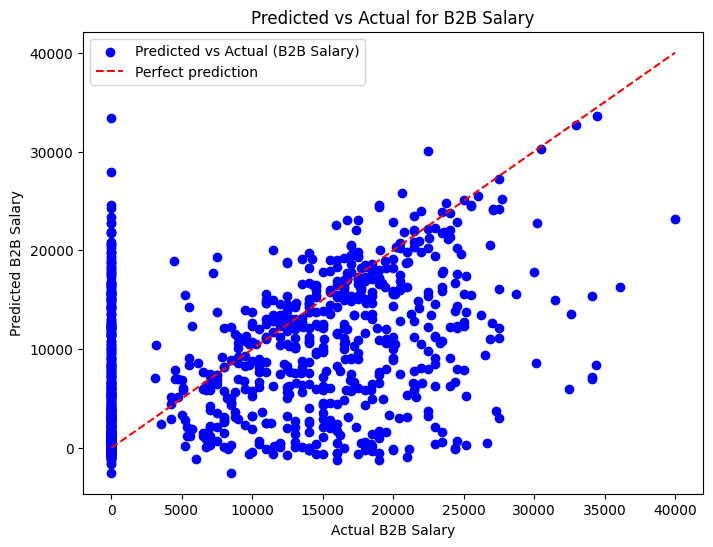

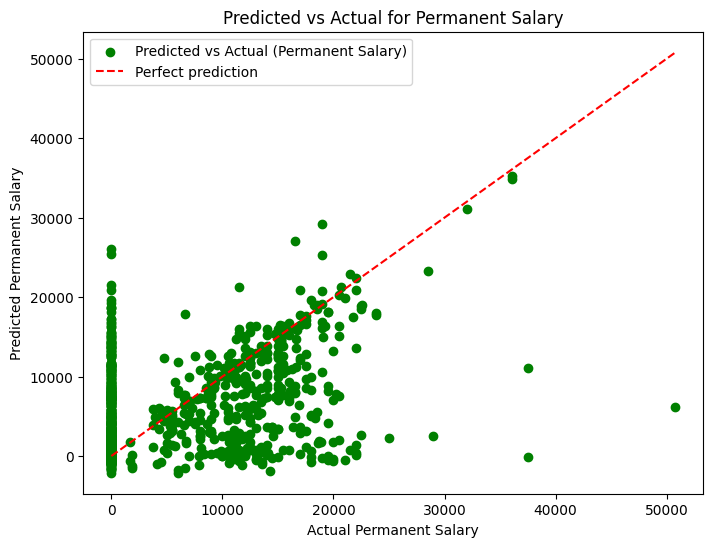

In [36]:
import matplotlib.pyplot as plt

y_test_b2b = y_test['salary_b2b'].values
y_test_permanent = y_test['salary_permanent'].values

y_pred_b2b = y_pred[:, 0]
y_pred_permanent = y_pred[:, 1]

# Plotting for salary_b2b
plt.figure(figsize=(8, 6))
plt.scatter(y_test_b2b, y_pred_b2b, color='blue', label='Predicted vs Actual (B2B Salary)')
plt.plot([min(y_test_b2b), max(y_test_b2b)], [min(y_test_b2b), max(y_test_b2b)], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual B2B Salary')
plt.ylabel('Predicted B2B Salary')
plt.title('Predicted vs Actual for B2B Salary')
plt.legend()
plt.show()

# Plotting for salary_permanent
plt.figure(figsize=(8, 6))
plt.scatter(y_test_permanent, y_pred_permanent, color='green', label='Predicted vs Actual (Permanent Salary)')
plt.plot([min(y_test_permanent), max(y_test_permanent)], [min(y_test_permanent), max(y_test_permanent)], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual Permanent Salary')
plt.ylabel('Predicted Permanent Salary')
plt.title('Predicted vs Actual for Permanent Salary')
plt.legend()
plt.show()